In [15]:
from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys():
  print(f'Fichier téléchargé : {filename}')
  # Vous pouvez ensuite utiliser 'filename' pour lire le fichier, par exemple avec pandas:
  # import pandas as pd
  # df = pd.read_csv(filename)
  # display(df.head())

Saving dirty_cafe_sales.csv to dirty_cafe_sales.csv
Fichier téléchargé : dirty_cafe_sales.csv


In [98]:
import pandas as pd
import numpy as np

# S'assurer que cafe_df contient bien les données initiales du fichier dirty_cafe_sales.csv
# Si cafe_df a déjà été modifié et que l'on veut les données *d'origine* avant tout nettoyage, il faudrait recharger.
# Cependant, comme le user mentionne dirty_cafe_sales.csv, nous utiliserons le cafe_df actuel.
# Si cafe_df_cleaned est le dernier état des données, et cafe_df a été modifié,
# on rechargerait dirty_cafe_sales.csv ici. Mais pour l'instant, je pars du principe que cafe_df
# représente l'état le plus proche de l'original après les premières conversions de snake_case.

print("Résumé statistique du DataFrame original 'cafe_df' (avant le nettoyage approfondi) :")
display(cafe_df.describe(include='all'))

Résumé statistique du DataFrame original 'cafe_df' (avant le nettoyage approfondi) :


,transaction id,item,quantity,price _per _unit,total _spent,payment _method,location,transaction _date
count,10000,9031,9521.000000,9821,9827,7421,6735,9841
unique,10000,8,NaN,8,19,5,4,367
top,TXN_9226047,Juice,NaN,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,NaN,2429,979,2291,3022,159
mean,NaN,NaN,3.028463,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,1.419007,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN


In [95]:
import pandas as pd
import numpy as np

# Utiliser une copie du DataFrame pour ne pas affecter les transformations ultérieures de cafe_df_cleaned si ce n'est pas déjà fait
# Assurez-vous que cafe_df est bien le DataFrame initial nettoyé des colonnes 'Item' et avec noms snake_cased.
item_price_analysis_df = cafe_df[['item', 'price _per _unit']].copy()

# Convertir 'price _per _unit' en numérique, en forçant les erreurs (comme 'ERROR' dans le fichier original) en NaN
# Nous gardons trace des erreurs pour le calcul du pourcentage d'erreur
initial_price_per_unit_count = item_price_analysis_df['price _per _unit'].count()
item_price_analysis_df['price _per _unit'] = pd.to_numeric(item_price_analysis_df['price _per _unit'], errors='coerce')
non_numeric_price_entries = item_price_analysis_df['price _per _unit'].isna().sum()

# Supprimer les lignes où 'item' est NaN pour l'analyse des prix par item
item_price_analysis_df_clean_item = item_price_analysis_df.dropna(subset=['item']).copy()

print("\nFréquence des combinaisons 'item' et 'price _per _unit' (après conversion de prix et avant suppression de NaN dans les prix) :")
display(item_price_analysis_df_clean_item.value_counts().sort_index())

# Calcul du pourcentage d'erreurs d'incohérence de prix (même item avec plusieurs prix)
item_unique_prices = item_price_analysis_df_clean_item.groupby('item')['price _per _unit'].nunique(dropna=True)
inconsistent_items_count = item_unique_prices[item_unique_prices > 1].count()
total_valid_items = item_unique_prices[item_unique_prices >= 1].count()

percentage_inconsistent_pricing = 0
if total_valid_items > 0:
    percentage_inconsistent_pricing = (inconsistent_items_count / total_valid_items) * 100

print(f"\nPourcentage d'erreurs d'incohérence de prix (articles avec >1 prix unitaire) : {percentage_inconsistent_pricing:.2f}%")

if inconsistent_items_count > 0:
    print("Items avec des prix unitaires incohérents (non-NaN) :")
    for item_name in item_unique_prices[item_unique_prices > 1].index:
        prices = item_price_analysis_df_clean_item[item_price_analysis_df_clean_item['item'] == item_name]['price _per _unit'].dropna().unique()
        print(f"- {item_name}: {sorted(prices)}")

# Calcul du pourcentage d'erreurs dues aux prix non numériques (ex: 'ERROR')
percentage_non_numeric_price_entries = 0
if initial_price_per_unit_count > 0:
    percentage_non_numeric_price_entries = (non_numeric_price_entries / initial_price_per_unit_count) * 100

print(f"\nPourcentage d'entrées 'price _per _unit' non numériques (convertis en NaN) : {percentage_non_numeric_price_entries:.2f}%")



Fréquence des combinaisons 'item' et 'price _per _unit' (après conversion de prix et avant suppression de NaN dans les prix) :


,,count
item,price _per _unit,
Cake,3.0,1085
Coffee,2.0,1108
Cookie,1.0,1026
Juice,3.0,1110
Salad,5.0,1082
Sandwich,4.0,1082
Smoothie,4.0,1036
Tea,1.5,1023



Pourcentage d'erreurs d'incohérence de prix (articles avec >1 prix unitaire) : 0.00%

Pourcentage d'entrées 'price _per _unit' non numériques (convertis en NaN) : 5.43%


In [22]:
import pandas as pd

# Charge le fichier dirty_cafe_sales.csv dans un nouveau DataFrame
cafe_df = pd.read_csv('dirty_cafe_sales.csv')

# Affiche les 5 premières lignes du DataFrame
display(cafe_df.head())

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [23]:
# Affiche les valeurs uniques de la colonne 'Item'
unique_items = cafe_df['Item'].unique()

print("Articles uniques disponibles :")
for item in unique_items:
    print(item)

Articles uniques disponibles :
Coffee
Cake
Cookie
Salad
Smoothie
UNKNOWN
Sandwich
nan
ERROR
Juice
Tea


Articles uniques disponibles :
Coffee
Cake
Cookie
Salad
Smoothie
UNKNOWN
Sandwich
nan
ERROR
Juice
Tea

Il n' y a pas de probleme de doublons d'Item.

UNKNOWN,nan,ERROR vont etre mis en nan.

In [24]:
import numpy as np

# Définir les valeurs à considérer comme non pertinentes dans la colonne 'Item'
items_to_clean = ['UNKNOWN', 'ERROR']

# Remplacer les valeurs identifiées et les NaN explicites par np.nan
# La conversion directe de 'nan' string en np.nan sera gérée par `replace` si le dtype est object.
cafe_df['Item'] = cafe_df['Item'].replace(items_to_clean, np.nan)

# Gérer spécifiquement les strings 'nan' si elles n'ont pas été automatiquement converties en float NaN lors du chargement
cafe_df['Item'] = cafe_df['Item'].replace('nan', np.nan)

# Afficher les valeurs uniques de la colonne 'Item' après le nettoyage
print("\nArticles uniques après nettoyage :")
unique_items_cleaned = cafe_df['Item'].unique()
for item in unique_items_cleaned:
    print(item)

# Afficher les 5 premières lignes du DataFrame pour voir l'impact du nettoyage
print("\nPremières lignes du DataFrame après nettoyage de 'Item' :")
display(cafe_df.head())


Articles uniques après nettoyage :
Coffee
Cake
Cookie
Salad
Smoothie
nan
Sandwich
Juice
Tea

Premières lignes du DataFrame après nettoyage de 'Item' :


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [41]:
import re

def to_snake_case(name):
    s1 = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
    return re.sub('([a-z0-9])([A-Z])', r'\1_\2', s1).lower()

# Appliquer la fonction to_snake_case à tous les noms de colonnes
cafe_df.columns = [to_snake_case(col) for col in cafe_df.columns]

print("Nouveaux noms de colonnes :")
print(cafe_df.columns)

# Afficher les 5 premières lignes du DataFrame avec les nouveaux noms de colonnes
print("\nPremières lignes du DataFrame avec les noms de colonnes en snake_case :")
display(cafe_df.head())

Nouveaux noms de colonnes :
Index(['transaction id', 'item', 'quantity', 'price _per _unit',
       'total _spent', 'payment _method', 'location', 'transaction _date'],
      dtype='object')

Premières lignes du DataFrame avec les noms de colonnes en snake_case :


,transaction id,item,quantity,price _per _unit,total _spent,payment _method,location,transaction _date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [42]:
import numpy as np

# Convertir la colonne 'quantity' en type numérique, en forçant les erreurs en NaN
cafe_df['quantity'] = pd.to_numeric(cafe_df['quantity'], errors='coerce')

# Identifier les quantités qui ne sont pas des entiers positifs
# 1. Valeurs NaN (après conversion des non-numériques)
# 2. Valeurs négatives ou zéro
# 3. Valeurs qui ne sont pas des entiers (par exemple, 1.5, 2.3)

# Filtrer les lignes qui ne respectent pas la condition
non_positive_or_non_integer_quantities = cafe_df[
    cafe_df['quantity'].isna() |
    (cafe_df['quantity'] <= 0) |
    (cafe_df['quantity'] != cafe_df['quantity'].astype(int, errors='ignore'))
]

if not non_positive_or_non_integer_quantities.empty:
    print("Les lignes suivantes contiennent des quantités qui ne sont pas des entiers positifs :")
    display(non_positive_or_non_integer_quantities[['quantity']]) # Affiche seulement la colonne 'quantity' pour ces lignes
else:
    print("Toutes les quantités sont des entiers positifs.")

Les lignes suivantes contiennent des quantités qui ne sont pas des entiers positifs :


,quantity
20,NaN
55,NaN
57,NaN
66,NaN
117,NaN
...,...
9932,NaN
9935,NaN
9944,NaN
9957,NaN


In [43]:
initial_rows = len(cafe_df)

# Supprime les lignes contenant des valeurs NaN
cafe_df_cleaned = cafe_df.dropna()

rows_removed = initial_rows - len(cafe_df_cleaned)

print(f"Nombre de lignes supprimées en raison de valeurs NaN : {rows_removed}")
print("\nPremières lignes du DataFrame après suppression des lignes avec NaN :")
display(cafe_df_cleaned.head())

Nombre de lignes supprimées en raison de valeurs NaN : 5877

Premières lignes du DataFrame après suppression des lignes avec NaN :


,transaction id,item,quantity,price _per _unit,total _spent,payment _method,location,transaction _date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [44]:
import numpy as np

initial_rows_before_total_spent_clean = len(cafe_df_cleaned)

# Convertir la colonne 'total _spent' en numérique, en forçant les erreurs (comme 'ERROR') en NaN
cafe_df_cleaned['total _spent'] = pd.to_numeric(cafe_df_cleaned['total _spent'], errors='coerce')

# Identifier les lignes où 'total _spent' n'est pas positif (NaN, zéro ou négatif)
non_positive_total_spent = cafe_df_cleaned[
    cafe_df_cleaned['total _spent'].isna() |
    (cafe_df_cleaned['total _spent'] <= 0)
]

if not non_positive_total_spent.empty:
    print("Les lignes suivantes contiennent des valeurs non positives ou non numériques pour 'total _spent' :")
    display(non_positive_total_spent[['total _spent']])

    # Supprimer ces lignes du DataFrame
    cafe_df_cleaned = cafe_df_cleaned.drop(non_positive_total_spent.index)

    rows_removed_total_spent = initial_rows_before_total_spent_clean - len(cafe_df_cleaned)
    print(f"\nNombre de lignes supprimées en raison de valeurs non positives/non numériques dans 'total _spent' : {rows_removed_total_spent}")
else:
    print("Toutes les valeurs de 'total _spent' sont des nombres positifs.")

print("\nPremières lignes du DataFrame après nettoyage de 'total _spent' :")
display(cafe_df_cleaned.head())

Les lignes suivantes contiennent des valeurs non positives ou non numériques pour 'total _spent' :


/tmp/ipython-input-3092530074.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cafe_df_cleaned['total _spent'] = pd.to_numeric(cafe_df_cleaned['total _spent'], errors='coerce')


,total _spent
2,NaN
94,NaN
253,NaN
280,NaN
294,NaN
...,...
9701,NaN
9779,NaN
9853,NaN
9954,NaN



Nombre de lignes supprimées en raison de valeurs non positives/non numériques dans 'total _spent' : 138

Premières lignes du DataFrame après nettoyage de 'total _spent' :


,transaction id,item,quantity,price _per _unit,total _spent,payment _method,location,transaction _date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
3,TXN_7034554,Salad,2.0,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
7,TXN_6699534,Sandwich,4.0,4.0,16.0,Cash,UNKNOWN,2023-10-28


In [45]:
import numpy as np

initial_rows_before_price_clean = len(cafe_df_cleaned)

# Convertir la colonne 'price _per _unit' en numérique, en forçant les erreurs en NaN
cafe_df_cleaned['price _per _unit'] = pd.to_numeric(cafe_df_cleaned['price _per _unit'], errors='coerce')

# Identifier les lignes où 'price _per _unit' n'est pas positif (NaN, zéro ou négatif)
non_positive_price = cafe_df_cleaned[
    cafe_df_cleaned['price _per _unit'].isna() |
    (cafe_df_cleaned['price _per _unit'] <= 0)
]

if not non_positive_price.empty:
    print("Les lignes suivantes contiennent des valeurs non positives ou non numériques pour 'price _per _unit' :")
    display(non_positive_price[['price _per _unit']])

    # Supprimer ces lignes du DataFrame
    cafe_df_cleaned = cafe_df_cleaned.drop(non_positive_price.index)

    rows_removed_price = initial_rows_before_price_clean - len(cafe_df_cleaned)
    print(f"\nNombre de lignes supprimées en raison de valeurs non positives/non numériques dans 'price _per _unit' : {rows_removed_price}")
else:
    print("Toutes les valeurs de 'price _per _unit' sont des nombres positifs.")

print("\nPremières lignes du DataFrame après nettoyage de 'price _per _unit' :")
display(cafe_df_cleaned.head())

Les lignes suivantes contiennent des valeurs non positives ou non numériques pour 'price _per _unit' :


,price _per _unit
147,NaN
161,NaN
162,NaN
196,NaN
228,NaN
...,...
9550,NaN
9742,NaN
9753,NaN
9796,NaN



Nombre de lignes supprimées en raison de valeurs non positives/non numériques dans 'price _per _unit' : 154

Premières lignes du DataFrame après nettoyage de 'price _per _unit' :


,transaction id,item,quantity,price _per _unit,total _spent,payment _method,location,transaction _date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
3,TXN_7034554,Salad,2.0,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
7,TXN_6699534,Sandwich,4.0,4.0,16.0,Cash,UNKNOWN,2023-10-28


In [46]:
# Affiche les valeurs uniques de la colonne 'payment _method'
unique_payment_methods = cafe_df_cleaned['payment _method'].unique()

print("Modes de paiement uniques disponibles :")
for method in unique_payment_methods:
    print(method)

Modes de paiement uniques disponibles :
Credit Card
Cash
UNKNOWN
Digital Wallet
ERROR


In [47]:
import numpy as np

# Définir les valeurs à considérer comme non pertinentes dans la colonne 'payment _method'
payment_methods_to_clean = ['UNKNOWN', 'ERROR']

# Remplacer les valeurs identifiées par np.nan
cafe_df_cleaned['payment _method'] = cafe_df_cleaned['payment _method'].replace(payment_methods_to_clean, np.nan)

# Afficher les valeurs uniques de la colonne 'payment _method' après le nettoyage
print("\nModes de paiement uniques après nettoyage :")
unique_payment_methods_cleaned = cafe_df_cleaned['payment _method'].unique()
for method in unique_payment_methods_cleaned:
    print(method)

# Afficher les 5 premières lignes du DataFrame pour voir l'impact du nettoyage
print("\nPremières lignes du DataFrame après nettoyage de 'payment _method' :")
display(cafe_df_cleaned.head())


Modes de paiement uniques après nettoyage :
Credit Card
Cash
nan
Digital Wallet

Premières lignes du DataFrame après nettoyage de 'payment _method' :


,transaction id,item,quantity,price _per _unit,total _spent,payment _method,location,transaction _date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
3,TXN_7034554,Salad,2.0,5.0,10.0,NaN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
7,TXN_6699534,Sandwich,4.0,4.0,16.0,Cash,UNKNOWN,2023-10-28


In [ ]:
#affiche les différents pricer-per-unit en fonction de l'item

In [63]:
import re

# Définir le motif regex pour 'TXN_' suivi de 7 chiffres
pattern = r'^TXN_\d{7}$'

# Filtrer les transaction id qui ne correspondent pas au motif
invalid_transaction_ids = cafe_df_cleaned[
    ~cafe_df_cleaned['transaction id'].astype(str).str.match(pattern, na=False)
]

if not invalid_transaction_ids.empty:
    print("Les transaction id suivantes ne correspondent pas au format 'TXN_' suivi de 7 chiffres :")
    display(invalid_transaction_ids[['transaction id']].drop_duplicates())
else:
    print("Toutes les transaction id correspondent au format 'TXN_' suivi de 7 chiffres.Les données sont cohérentes et fiables")

Toutes les transaction id correspondent au format 'TXN_' suivi de 7 chiffres.Les données sont cohérentes et fiables


In [68]:
import numpy as np

# Définir les listes d'articles pour chaque catégorie
boisson_items = ['Coffee', 'Smoothie', 'Juice', 'Tea']
nourriture_items = ['Cake', 'Cookie', 'Salad']

# Créer la nouvelle colonne 'item_category'
# Utilisation de np.select pour une classification efficace
conditions = [
    cafe_df_cleaned['item'].isin(boisson_items),
    cafe_df_cleaned['item'].isin(nourriture_items)
]
choices = ['boisson', 'nourriture']

# Correction: Utiliser None comme valeur par défaut pour éviter le TypeError avec les dtypes mixtes
cafe_df_cleaned['item_category'] = np.select(conditions, choices, default=None)

print("Répartition des articles par nouvelle catégorie :")
display(cafe_df_cleaned['item_category'].value_counts(dropna=False))

# Afficher les 5 premières lignes avec la nouvelle colonne pour vérifier
print("\nPremières lignes du DataFrame avec la nouvelle colonne 'item_category' :")
display(cafe_df_cleaned.head())

Répartition des articles par nouvelle catégorie :


,count
item_category,
boisson,1862
nourriture,1484
None,485



Premières lignes du DataFrame avec la nouvelle colonne 'item_category' :


,transaction id,item,quantity,price _per _unit,total _spent,payment _method,location,transaction _date,item_category
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08,boisson
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16,nourriture
3,TXN_7034554,Salad,2.0,5.0,10.0,NaN,NaN,2023-04-27,nourriture
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11,boisson
7,TXN_6699534,Sandwich,4.0,4.0,16.0,Cash,NaN,2023-10-28,None


In [ ]:
#fait un graphique un cammembert pour chiffre d'affaire boisson et nourriture

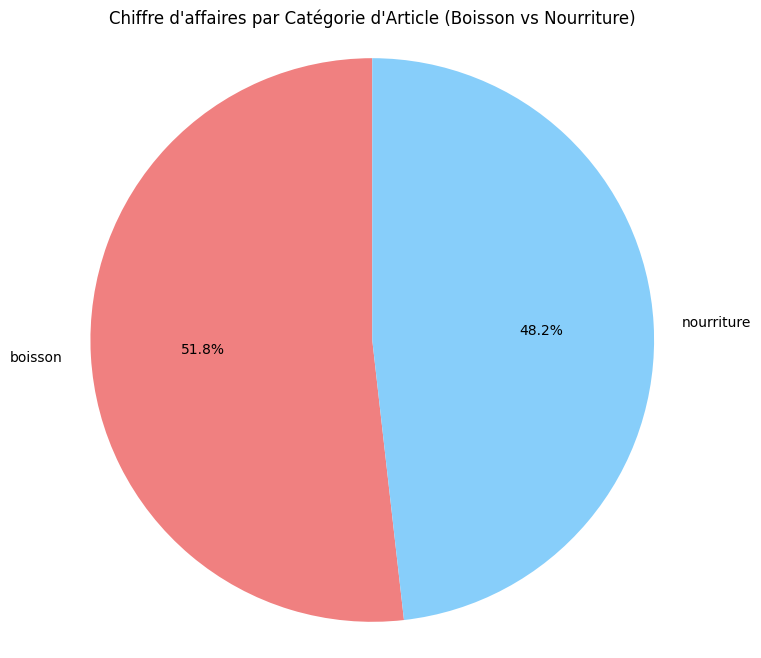

In [69]:
import matplotlib.pyplot as plt

# Calculer le chiffre d'affaires total pour chaque catégorie d'articles
turnover_by_category = cafe_df_cleaned.groupby('item_category')['total _spent'].sum().reset_index()

# Exclure les catégories qui pourraient être NaN si elles n'ont pas été classées
turnover_by_category = turnover_by_category.dropna(subset=['item_category'])

# Créer le graphique en camembert
fig = plt.figure(figsize=(8, 8))
plt.pie(turnover_by_category['total _spent'],
        labels=turnover_by_category['item_category'],
        autopct='%1.1f%%',
        startangle=90,
        colors=['lightcoral', 'lightskyblue'])

plt.title('Chiffre d\'affaires par Catégorie d\'Article (Boisson vs Nourriture)')
plt.axis('equal')  # Assure que le camembert est un cercle parfait.
plt.show()

In [70]:
print("Prix unitaires par article :")
for item in cafe_df_cleaned['item'].unique():
    # Filtrer le DataFrame pour l'article actuel
    item_prices = cafe_df_cleaned[cafe_df_cleaned['item'] == item]['price _per _unit'].unique()
    # Supprimer les NaN de la liste des prix s'il y en a
    item_prices = item_prices[~pd.isna(item_prices)]

    if len(item_prices) > 0:
        print(f"  {item}: {sorted(item_prices)}")
    else:
        print(f"  {item}: Aucun prix disponible (NaN)")

Prix unitaires par article :
  Coffee: [np.float64(2.0)]
  Cake: [np.float64(3.0)]
  Salad: [np.float64(5.0)]
  Sandwich: [np.float64(4.0)]
  Juice: [np.float64(3.0)]
  Smoothie: [np.float64(4.0)]
  Cookie: [np.float64(1.0)]
  Tea: [np.float64(1.5)]


Les données sont cohérentes et unique par item.

In [48]:
# Affiche les valeurs uniques de la colonne 'location'
unique_locations = cafe_df_cleaned['location'].unique()

print("Locations uniques disponibles :")
for location in unique_locations:
    print(location)

Locations uniques disponibles :
Takeaway
In-store
UNKNOWN
ERROR


In [49]:
import numpy as np

# Définir les valeurs à considérer comme non pertinentes dans la colonne 'location'
locations_to_clean = ['UNKNOWN', 'ERROR']

# Remplacer les valeurs identifiées par np.nan
cafe_df_cleaned['location'] = cafe_df_cleaned['location'].replace(locations_to_clean, np.nan)

# Afficher les valeurs uniques de la colonne 'location' après le nettoyage
print("\nLocations uniques après nettoyage :")
unique_locations_cleaned = cafe_df_cleaned['location'].unique()
for location in unique_locations_cleaned:
    print(location)

# Afficher les 5 premières lignes du DataFrame pour voir l'impact du nettoyage
print("\nPremières lignes du DataFrame après nettoyage de 'location' :")
display(cafe_df_cleaned.head())


Locations uniques après nettoyage :
Takeaway
In-store
nan

Premières lignes du DataFrame après nettoyage de 'location' :


,transaction id,item,quantity,price _per _unit,total _spent,payment _method,location,transaction _date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
3,TXN_7034554,Salad,2.0,5.0,10.0,NaN,NaN,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
7,TXN_6699534,Sandwich,4.0,4.0,16.0,Cash,NaN,2023-10-28


In [50]:
import pandas as pd

# Convertir la colonne 'transaction _date' en type datetime, avec erreurs='coerce'
# Cela transformera les dates non valides en NaT (Not a Time)
cafe_df_cleaned['transaction _date'] = pd.to_datetime(cafe_df_cleaned['transaction _date'], errors='coerce')

# Identifier les lignes où la conversion a échoué (où 'transaction _date' est NaT)
invalid_dates = cafe_df_cleaned[cafe_df_cleaned['transaction _date'].isna()]

if not invalid_dates.empty:
    print("Les lignes suivantes contiennent des dates invalides dans la colonne 'transaction _date' :")
    display(invalid_dates[['transaction _date']].drop_duplicates())
else:
    print("Toutes les dates de la colonne 'transaction _date' sont valides.")

# Afficher les informations sur la colonne après conversion pour vérifier le dtype
print("\nInformations sur la colonne 'transaction _date' après conversion :")
cafe_df_cleaned['transaction _date'].info()

Les lignes suivantes contiennent des dates invalides dans la colonne 'transaction _date' :


,transaction _date
11,NaT



Informations sur la colonne 'transaction _date' après conversion :
<class 'pandas.core.series.Series'>
Index: 3831 entries, 0 to 9999
Series name: transaction _date
Non-Null Count  Dtype         
--------------  -----         
3716 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 59.9 KB


In [51]:
if not invalid_dates.empty:
    print(f"Il y a {len(invalid_dates.drop_duplicates(subset=['transaction _date']))} dates invalides uniques et {len(invalid_dates)} occurrences au total dans la colonne 'transaction _date' :")
    display(invalid_dates[['transaction _date']])
else:
    print("Il n'y a aucune date invalide dans la colonne 'transaction _date'.")

Il y a 1 dates invalides uniques et 115 occurrences au total dans la colonne 'transaction _date' :


,transaction _date
11,NaT
29,NaT
115,NaT
224,NaT
300,NaT
...,...
9404,NaT
9411,NaT
9428,NaT
9710,NaT


In [60]:
#Verifier que les données sont cohérentes: quantity	* price _per _unit	= total _spent
# Calculer le 'total_spent_expected'
cafe_df_cleaned['total_spent_expected'] = cafe_df_cleaned['quantity'] * cafe_df_cleaned['price _per _unit']

# Identifier les lignes où 'total _spent' ne correspond pas à 'total_spent_expected'
# Utilisation d'une petite tolérance pour les comparaisons de nombres à virgule flottante
discrepancies = cafe_df_cleaned[
    ~np.isclose(cafe_df_cleaned['total _spent'], cafe_df_cleaned['total_spent_expected'], atol=1e-2)
]

if not discrepancies.empty:
    print("Les lignes suivantes présentent une incohérence entre (quantity * price_per_unit) et total_spent :")
    display(discrepancies[['quantity', 'price _per _unit', 'total _spent', 'total_spent_expected']])
else:
    print("Toutes les données sont cohérentes : quantity * price_per_unit = total_spent.")

# Supprimer la colonne temporaire 'total_spent_expected' si elle n'est plus nécessaire
cafe_df_cleaned = cafe_df_cleaned.drop(columns=['total_spent_expected'])

Toutes les données sont cohérentes : quantity * price_per_unit = total_spent.


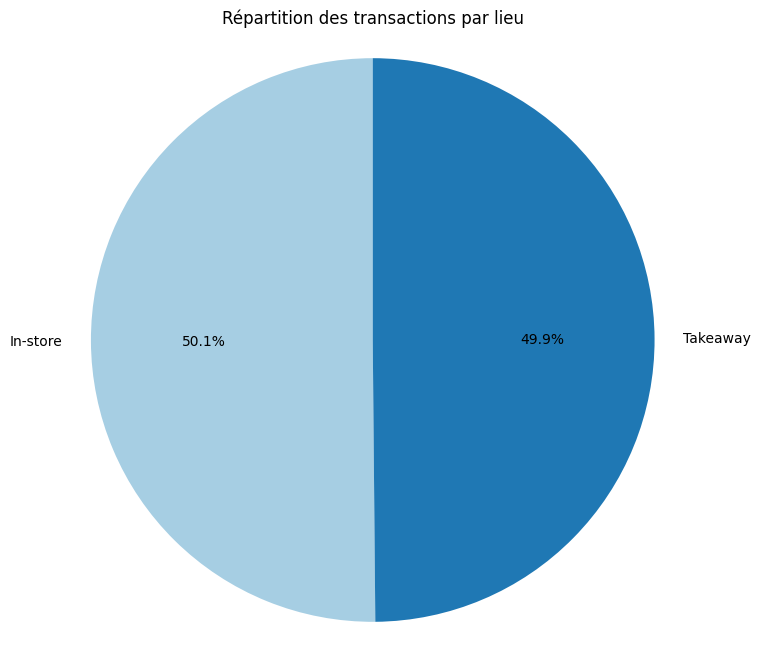

In [52]:
import matplotlib.pyplot as plt

# Compter le nombre de transactions par lieu, en excluant les valeurs NaN
transactions_by_location = cafe_df_cleaned['location'].value_counts().reset_index()
transactions_by_location.columns = ['location', 'transaction_count']

# Créer le graphique en camembert
fig = plt.figure(figsize=(8, 8))
plt.pie(transactions_by_location['transaction_count'],
        labels=transactions_by_location['location'],
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Paired.colors)

plt.title('Répartition des transactions par lieu')
plt.axis('equal')  # Assure que le camembert est un cercle parfait.
plt.show()

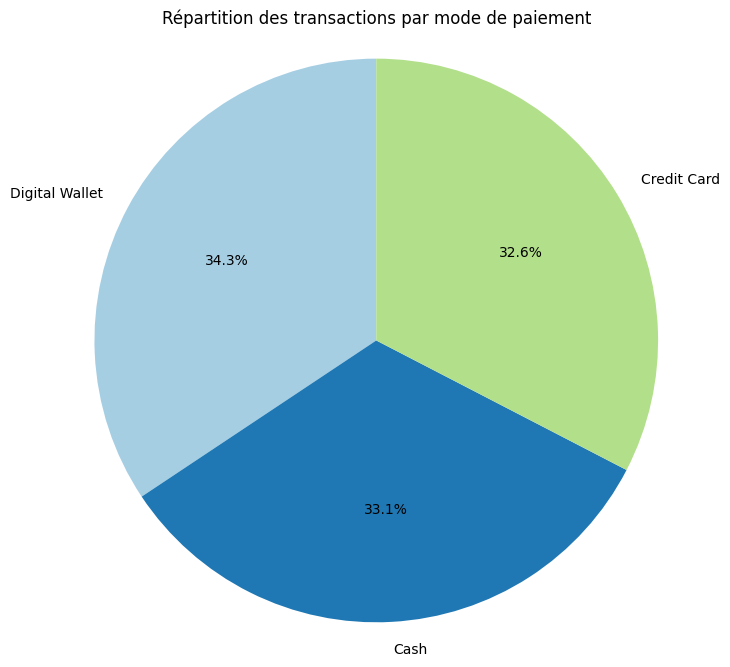

In [53]:
import matplotlib.pyplot as plt

# Compter le nombre de transactions par mode de paiement, en excluant les valeurs NaN
transactions_by_payment_method = cafe_df_cleaned['payment _method'].value_counts().reset_index()
transactions_by_payment_method.columns = ['payment_method', 'transaction_count']

# Créer le graphique en camembert
fig = plt.figure(figsize=(8, 8))
plt.pie(transactions_by_payment_method['transaction_count'],
        labels=transactions_by_payment_method['payment_method'],
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Paired.colors)

plt.title('Répartition des transactions par mode de paiement')
plt.axis('equal')  # Assure que le camembert est un cercle parfait.
plt.show()

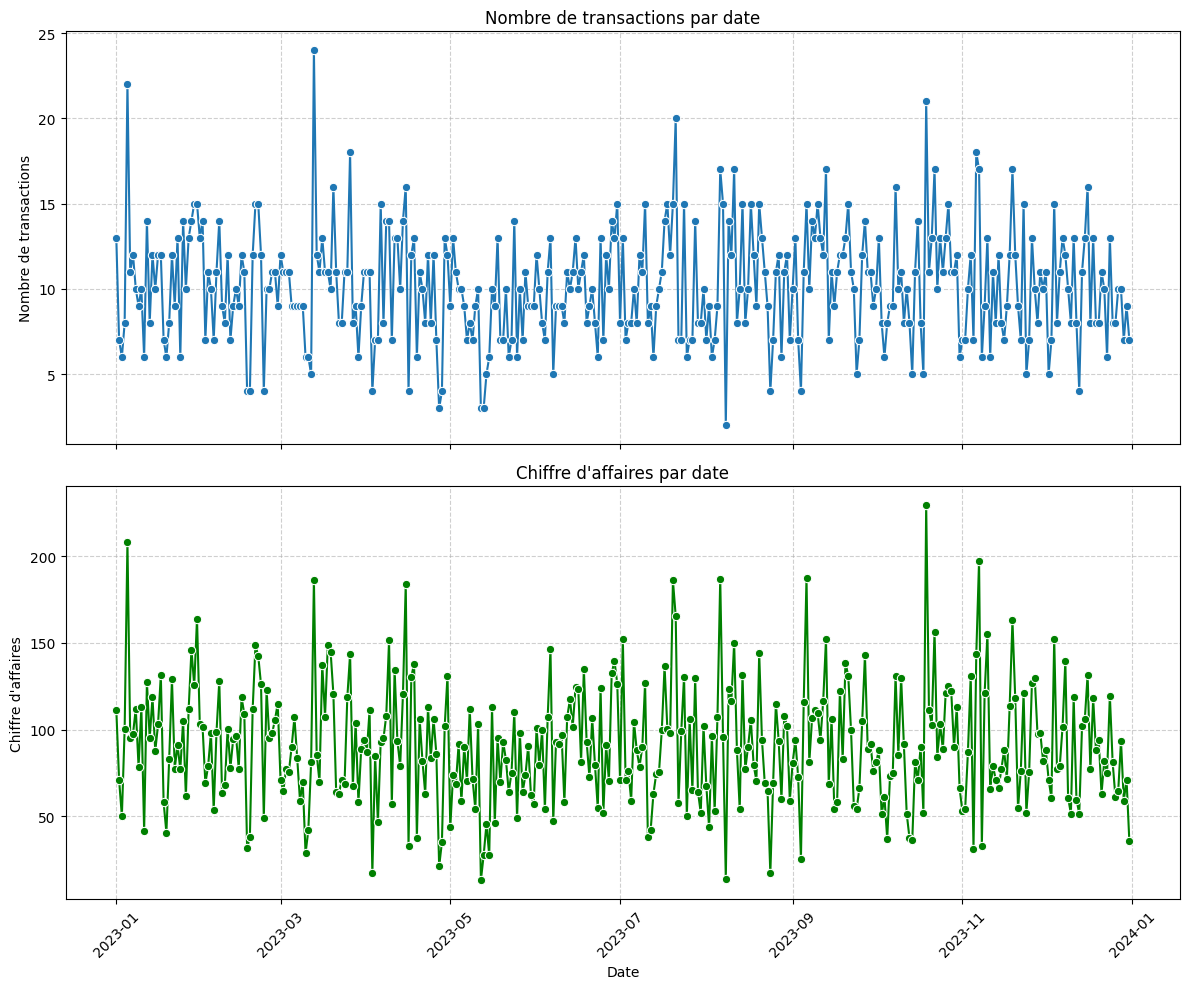

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcul du nombre de transactions par date
transactions_by_date = cafe_df_cleaned.groupby('transaction _date').size().reset_index(name='transaction_count')

# Calcul du chiffre d'affaires (total_spent) par date
turnover_by_date = cafe_df_cleaned.groupby('transaction _date')['total _spent'].sum().reset_index(name='total_spent_sum')

# Création de la figure avec deux sous-graphiques
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10), sharex=True)

# Graphique 1: Nombre de transactions par date
sns.lineplot(ax=axes[0], x='transaction _date', y='transaction_count', data=transactions_by_date, marker='o')
axes[0].set_title('Nombre de transactions par date')
axes[0].set_ylabel('Nombre de transactions')
axes[0].grid(True, linestyle='--', alpha=0.6)

# Graphique 2: Chiffre d'affaires par date
sns.lineplot(ax=axes[1], x='transaction _date', y='total_spent_sum', data=turnover_by_date, marker='o', color='green')
axes[1].set_title('Chiffre d\'affaires par date')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Chiffre d\'affaires')
axes[1].grid(True, linestyle='--', alpha=0.6)

# Amélioration de la lisibilité des dates sur l'axe des x
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

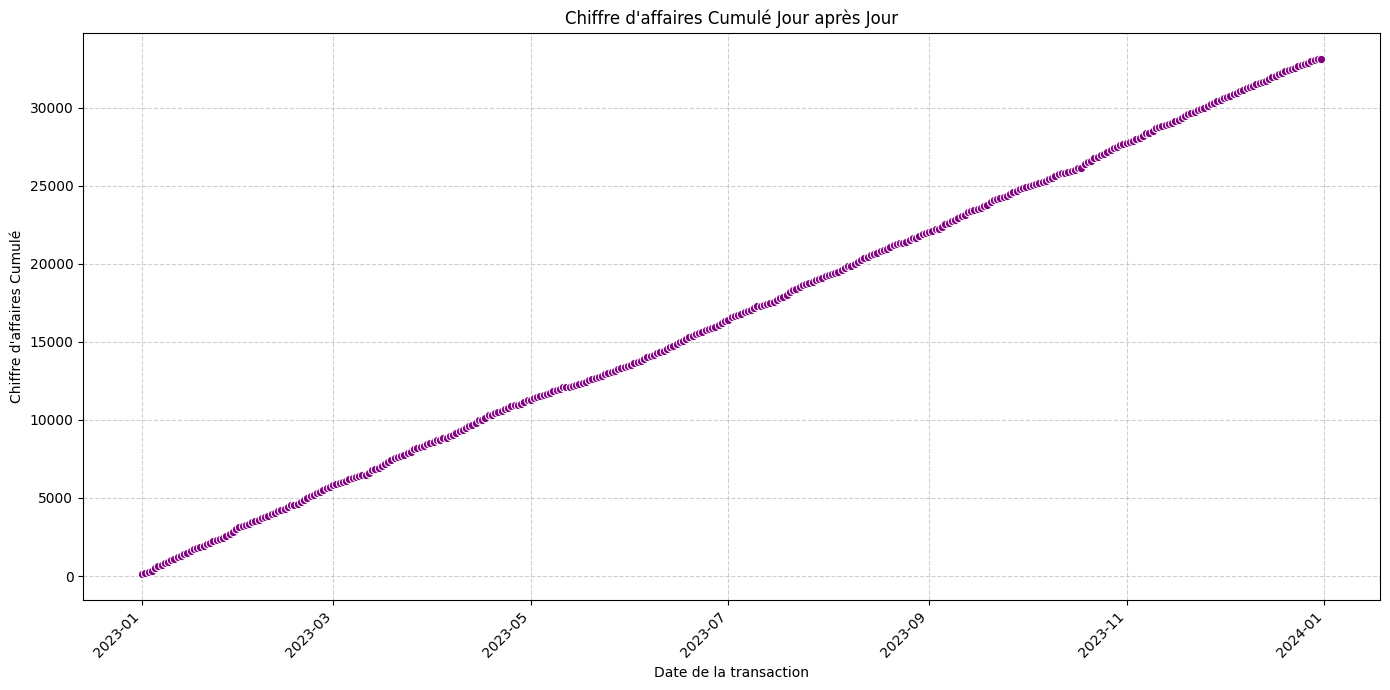

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# S'assurer que 'transaction _date' est au format datetime et trier par date
cafe_df_cleaned['transaction _date'] = pd.to_datetime(cafe_df_cleaned['transaction _date'], errors='coerce')
cafe_df_cleaned_valid_dates = cafe_df_cleaned.dropna(subset=['transaction _date']).sort_values('transaction _date')

# Calculer le chiffre d'affaires total par jour
daily_turnover = cafe_df_cleaned_valid_dates.groupby('transaction _date')['total _spent'].sum().reset_index()

# Calculer le chiffre d'affaires cumulé
daily_turnover['cumulative_total_spent'] = daily_turnover['total _spent'].cumsum()

# Créer le graphique du chiffre d'affaires cumulé
fig = plt.figure(figsize=(14, 7))
sns.lineplot(x='transaction _date', y='cumulative_total_spent', data=daily_turnover, marker='o', color='purple')

plt.title('Chiffre d\'affaires Cumulé Jour après Jour')
plt.xlabel('Date de la transaction')
plt.ylabel('Chiffre d\'affaires Cumulé')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-2479321555.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cafe_df_cleaned_valid_dates['month'] = cafe_df_cleaned_valid_dates['transaction _date'].dt.to_period('M')
/tmp/ipython-input-2479321555.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cafe_df_cleaned_valid_dates['quarter'] = cafe_df_cleaned_valid_dates['transaction _date'].dt.to_period('Q')
/tmp/ipython-input-2479321555.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in 

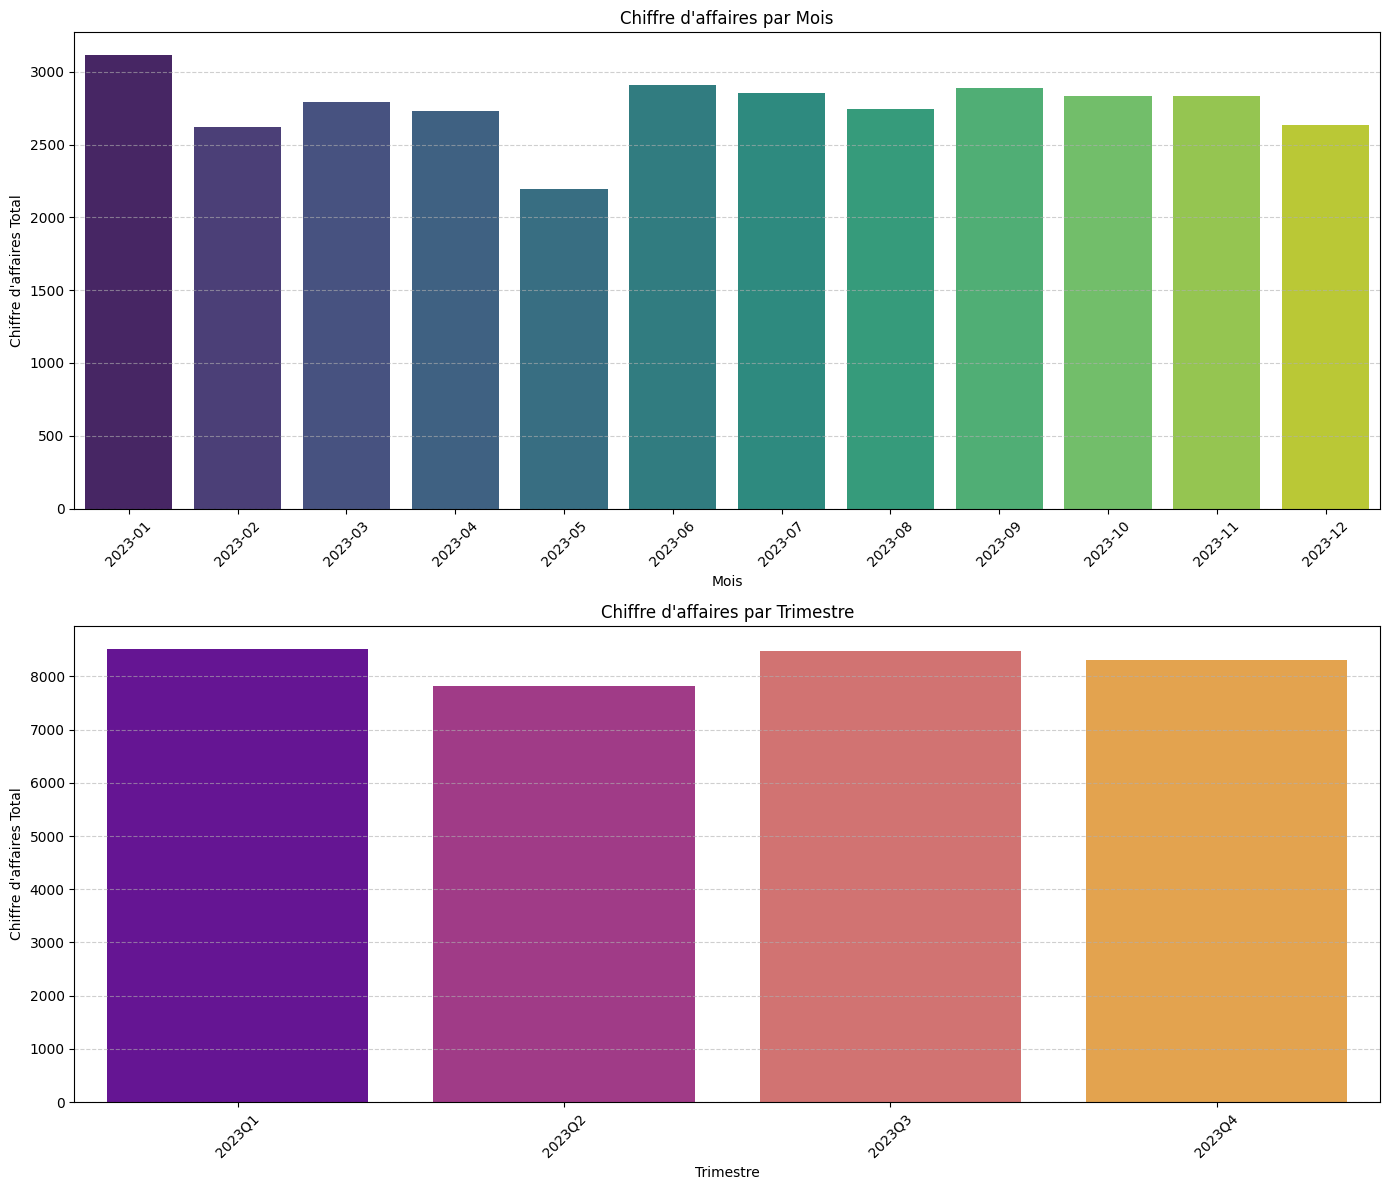

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assurer que 'transaction _date' est au format datetime
cafe_df_cleaned['transaction _date'] = pd.to_datetime(cafe_df_cleaned['transaction _date'], errors='coerce')
cafe_df_cleaned_valid_dates = cafe_df_cleaned.dropna(subset=['transaction _date'])

# --- Chiffre d'affaires par mois ---
cafe_df_cleaned_valid_dates['month'] = cafe_df_cleaned_valid_dates['transaction _date'].dt.to_period('M')
monthly_turnover = cafe_df_cleaned_valid_dates.groupby('month')['total _spent'].sum().reset_index()
monthly_turnover['month'] = monthly_turnover['month'].astype(str) # Convertir en string pour le plotting

# --- Chiffre d'affaires par trimestre ---
cafe_df_cleaned_valid_dates['quarter'] = cafe_df_cleaned_valid_dates['transaction _date'].dt.to_period('Q')
quarterly_turnover = cafe_df_cleaned_valid_dates.groupby('quarter')['total _spent'].sum().reset_index()
quarterly_turnover['quarter'] = quarterly_turnover['quarter'].astype(str) # Convertir en string pour le plotting

# Création de la figure avec deux sous-graphiques
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 12))

# Graphique 1: Chiffre d'affaires par mois
sns.barplot(ax=axes[0], x='month', y='total _spent', data=monthly_turnover, palette='viridis')
axes[0].set_title('Chiffre d\'affaires par Mois')
axes[0].set_xlabel('Mois')
axes[0].set_ylabel('Chiffre d\'affaires Total')
axes[0].grid(axis='y', linestyle='--', alpha=0.6)
axes[0].tick_params(axis='x', rotation=45)

# Graphique 2: Chiffre d'affaires par trimestre
sns.barplot(ax=axes[1], x='quarter', y='total _spent', data=quarterly_turnover, palette='plasma')
axes[1].set_title('Chiffre d\'affaires par Trimestre')
axes[1].set_xlabel('Trimestre')
axes[1].set_ylabel('Chiffre d\'affaires Total')
axes[1].grid(axis='y', linestyle='--', alpha=0.6)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

/tmp/ipython-input-1318659060.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cafe_df_cleaned_valid_dates['day_of_week'] = cafe_df_cleaned_valid_dates['transaction _date'].dt.dayofweek
/tmp/ipython-input-1318659060.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cafe_df_cleaned_valid_dates['day_name'] = cafe_df_cleaned_valid_dates['day_of_week'].map(lambda x: day_names[x])
/tmp/ipython-input-1318659060.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remo

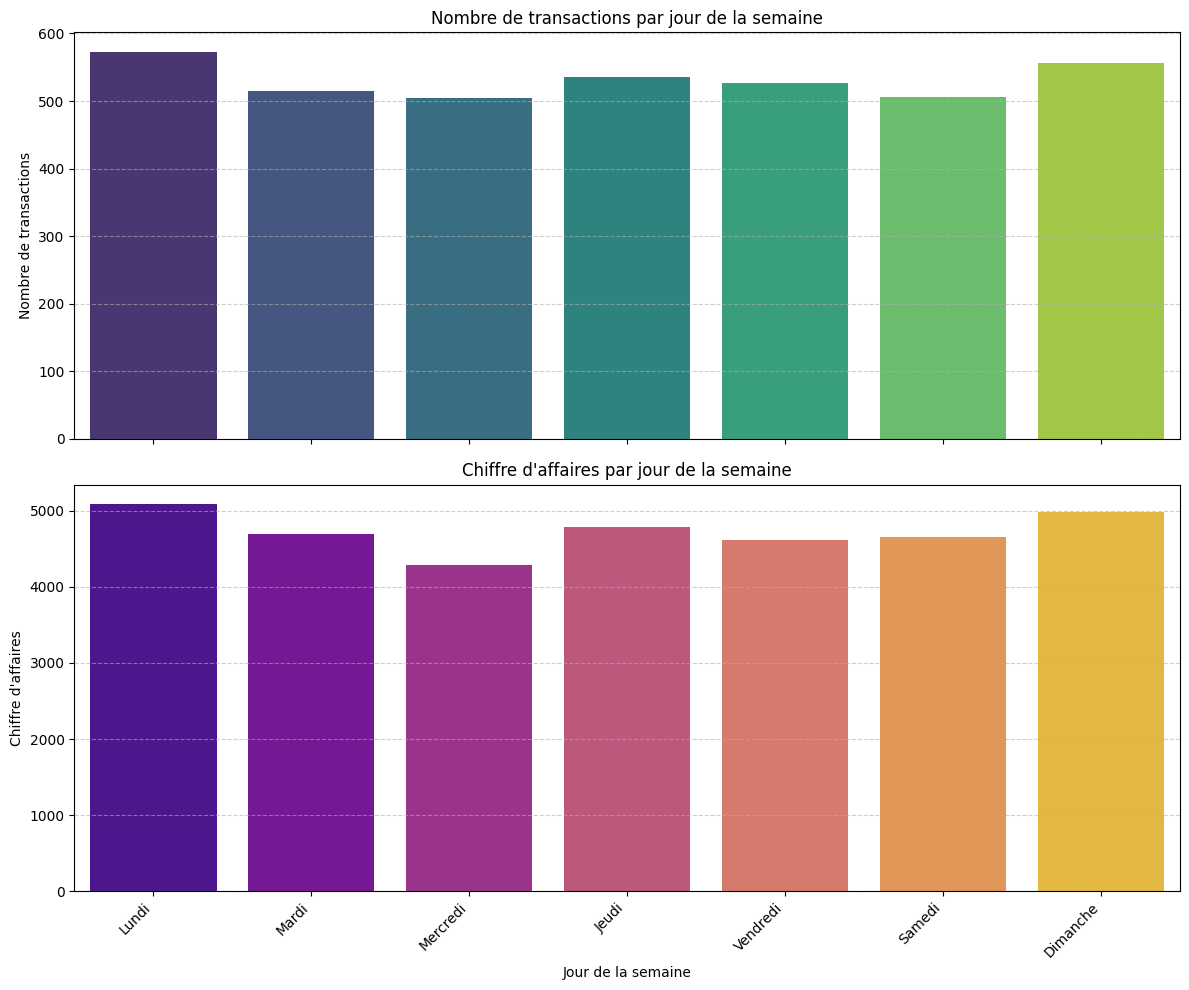

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# S'assurer que 'transaction _date' est bien au format datetime
cafe_df_cleaned['transaction _date'] = pd.to_datetime(cafe_df_cleaned['transaction _date'], errors='coerce')

# Supprimer les lignes où 'transaction _date' est NaT après la conversion
cafe_df_cleaned_valid_dates = cafe_df_cleaned.dropna(subset=['transaction _date'])

# Extraire le jour de la semaine (0=Lundi, 6=Dimanche)
cafe_df_cleaned_valid_dates['day_of_week'] = cafe_df_cleaned_valid_dates['transaction _date'].dt.dayofweek

# Mapper les numéros de jour aux noms de jour pour une meilleure lisibilité
day_names = ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']
cafe_df_cleaned_valid_dates['day_name'] = cafe_df_cleaned_valid_dates['day_of_week'].map(lambda x: day_names[x])

# Calcul du nombre de transactions par jour de la semaine
transactions_by_day = cafe_df_cleaned_valid_dates.groupby('day_name').size().reindex(day_names).reset_index(name='transaction_count')
transactions_by_day.columns = ['day_name', 'transaction_count']

# Calcul du chiffre d'affaires (total_spent) par jour de la semaine
turnover_by_day = cafe_df_cleaned_valid_dates.groupby('day_name')['total _spent'].sum().reindex(day_names).reset_index(name='total_spent_sum')
turnover_by_day.columns = ['day_name', 'total_spent_sum']

# Création de la figure avec deux sous-graphiques
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10), sharex=True)

# Graphique 1: Nombre de transactions par jour de la semaine
sns.barplot(ax=axes[0], x='day_name', y='transaction_count', data=transactions_by_day, palette='viridis')
axes[0].set_title('Nombre de transactions par jour de la semaine')
axes[0].set_ylabel('Nombre de transactions')
axes[0].grid(axis='y', linestyle='--', alpha=0.6)

# Graphique 2: Chiffre d'affaires par jour de la semaine
sns.barplot(ax=axes[1], x='day_name', y='total_spent_sum', data=turnover_by_day, palette='plasma')
axes[1].set_title('Chiffre d\'affaires par jour de la semaine')
axes[1].set_xlabel('Jour de la semaine')
axes[1].set_ylabel('Chiffre d\'affaires')
axes[1].grid(axis='y', linestyle='--', alpha=0.6)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

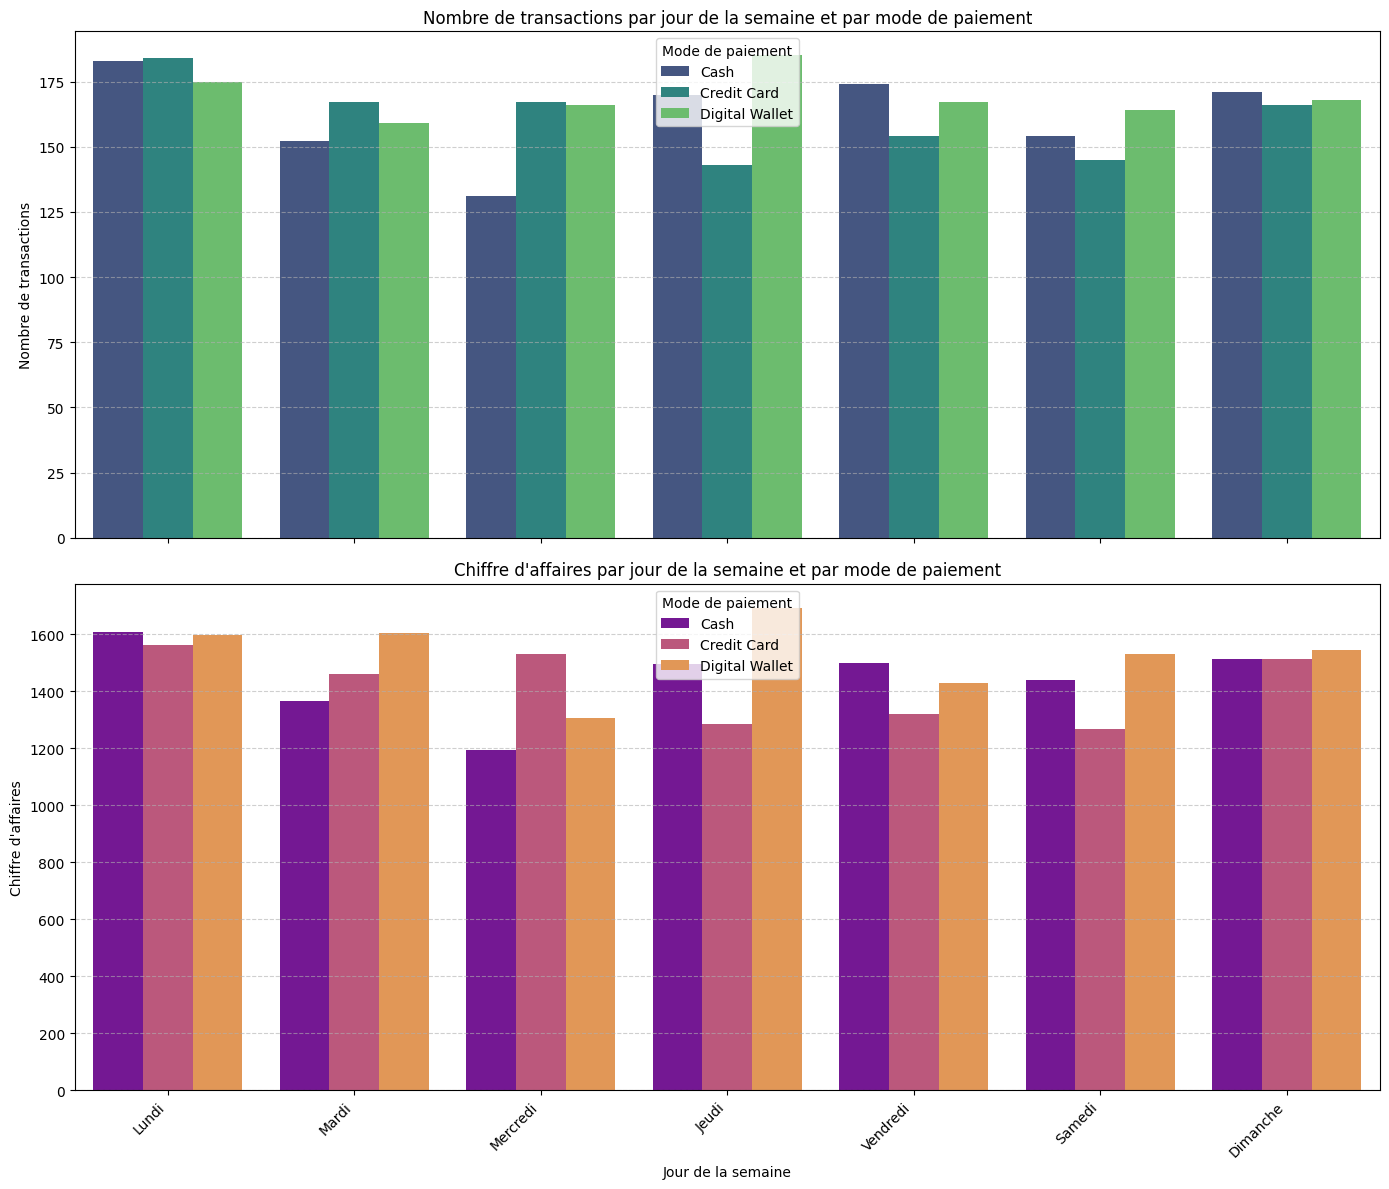

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# S'assurer que 'transaction _date' est bien au format datetime
cafe_df_cleaned['transaction _date'] = pd.to_datetime(cafe_df_cleaned['transaction _date'], errors='coerce')
cafe_df_cleaned_valid_dates = cafe_df_cleaned.dropna(subset=['transaction _date']).copy()

# Extraire le jour de la semaine (0=Lundi, 6=Dimanche)
cafe_df_cleaned_valid_dates['day_of_week'] = cafe_df_cleaned_valid_dates['transaction _date'].dt.dayofweek

# Mapper les numéros de jour aux noms de jour pour une meilleure lisibilité
day_names = ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']
cafe_df_cleaned_valid_dates['day_name'] = cafe_df_cleaned_valid_dates['day_of_week'].map(lambda x: day_names[x])

# Créer une nouvelle colonne pour catégoriser les modes de paiement
# Utiliser directement les valeurs nettoyées de 'payment _method' comme catégories
cafe_df_cleaned_valid_dates['payment_category'] = cafe_df_cleaned_valid_dates['payment _method']

# Calcul du nombre de transactions par jour de la semaine et par catégorie de paiement
transactions_by_day_and_payment = cafe_df_cleaned_valid_dates.groupby(['day_name', 'payment_category']).size().reset_index(name='transaction_count')

# Calcul du chiffre d'affaires (total_spent) par jour de la semaine et par catégorie de paiement
turnover_by_day_and_payment = cafe_df_cleaned_valid_dates.groupby(['day_name', 'payment_category'])['total _spent'].sum().reset_index(name='total_spent_sum')

# Réordonner les jours de la semaine pour l'affichage
transactions_by_day_and_payment['day_name'] = pd.Categorical(transactions_by_day_and_payment['day_name'], categories=day_names, ordered=True)
transactions_by_day_and_payment = transactions_by_day_and_payment.sort_values('day_name')

turnover_by_day_and_payment['day_name'] = pd.Categorical(turnover_by_day_and_payment['day_name'], categories=day_names, ordered=True)
turnover_by_day_and_payment = turnover_by_day_and_payment.sort_values('day_name')

# Création de la figure avec deux sous-graphiques
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 12), sharex=True)

# Graphique 1: Nombre de transactions par jour de la semaine et par catégorie de paiement
sns.barplot(ax=axes[0], x='day_name', y='transaction_count', hue='payment_category', data=transactions_by_day_and_payment, palette='viridis')
axes[0].set_title('Nombre de transactions par jour de la semaine et par mode de paiement')
axes[0].set_ylabel('Nombre de transactions')
axes[0].grid(axis='y', linestyle='--', alpha=0.6)
axes[0].legend(title='Mode de paiement')

# Graphique 2: Chiffre d'affaires par jour de la semaine et par catégorie de paiement
sns.barplot(ax=axes[1], x='day_name', y='total_spent_sum', hue='payment_category', data=turnover_by_day_and_payment, palette='plasma')
axes[1].set_title('Chiffre d\'affaires par jour de la semaine et par mode de paiement')
axes[1].set_xlabel('Jour de la semaine')
axes[1].set_ylabel('Chiffre d\'affaires')
axes[1].grid(axis='y', linestyle='--', alpha=0.6)
axes[1].legend(title='Mode de paiement')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [80]:
# Enregistre le DataFrame nettoyé dans un fichier CSV
output_filename = 'cafe_sales_cleaned.csv'
cafe_df_cleaned.to_csv(output_filename, index=False)

print(f"Le fichier '{output_filename}' a été créé dans votre environnement Colab.")

# Propose le téléchargement du fichier
from google.colab import files
files.download(output_filename)

Le fichier 'cafe_sales_cleaned.csv' a été créé dans votre environnement Colab.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [83]:
#valeur moyenne des total _spent
average_total_spent = cafe_df_cleaned['total _spent'].mean()
print(f"La valeur moyenne de 'total _spent' est : {average_total_spent:.2f}")

La valeur moyenne de 'total _spent' est : 8.91


In [ ]:
#cout moyen pas location en format camembert

In [85]:
average_total_spent_by_location = cafe_df_cleaned.groupby('location')['total _spent'].mean().reset_index()
print("Moyenne de 'total _spent' par location :")
display(average_total_spent_by_location)

Moyenne de 'total _spent' par location :


,location,total _spent
0,In-store,9.057681
1,Takeaway,8.772012


In [90]:
print("Résumé statistique des colonnes numériques du DataFrame 'cafe_df_cleaned' :")
display(cafe_df_cleaned.describe(include=['float', 'int']))

Résumé statistique des colonnes numériques du DataFrame 'cafe_df_cleaned' :


,quantity,price _per _unit,total _spent
count,3831.000000,3831.000000,3831.000000
mean,3.014879,2.954973,8.910076
std,1.416810,1.290099,6.014805
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,4.000000
50%,3.000000,3.000000,8.000000
75%,4.000000,4.000000,12.000000
max,5.000000,5.000000,25.000000


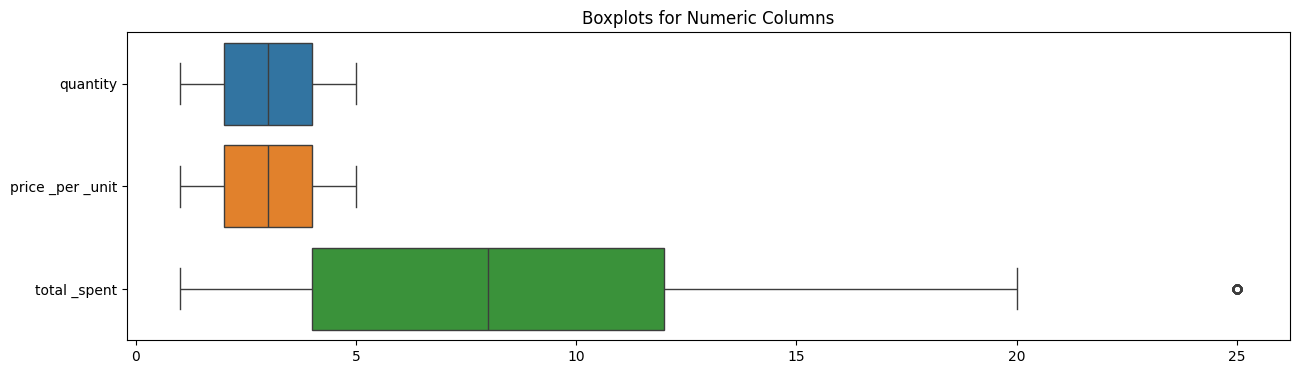

In [91]:
# To see outliers in numerical columns, import Python libraries for visualization.
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = cafe_df_cleaned.select_dtypes(include=['float', 'int']).columns

plt.figure(figsize=(15, 4))
sns.boxplot(data=cafe_df_cleaned[numeric_cols], orient='h')
plt.title('Boxplots for Numeric Columns')
plt.show()

In [96]:
# Inspect values in categorical columns
cat_cols = ['item', 'payment _method', 'location']
for col in cat_cols:
    print(f"{cafe_df_cleaned[col].value_counts()}\n")

item
Juice       513
Salad       510
Cake        491
Sandwich    485
Cookie      483
Tea         461
Coffee      454
Smoothie    434
Name: count, dtype: int64

payment _method
Digital Wallet    1220
Cash              1174
Credit Card       1158
Name: count, dtype: int64

location
In-store    1725
Takeaway    1715
Name: count, dtype: int64



In [97]:
# Calculer le nombre de valeurs manquantes par colonne
missing_counts = cafe_df_cleaned.isnull().sum()

# Calculer le pourcentage de valeurs manquantes par colonne
missing_percentages = (cafe_df_cleaned.isnull().sum() / len(cafe_df_cleaned)) * 100

# Créer un DataFrame pour afficher ces informations
missing_info = pd.DataFrame({
    'Nombre de valeurs manquantes': missing_counts,
    'Pourcentage de valeurs manquantes': missing_percentages
})

# Filtrer pour n'afficher que les colonnes ayant des valeurs manquantes et trier
missing_info = missing_info[missing_info['Nombre de valeurs manquantes'] > 0].sort_values(by='Pourcentage de valeurs manquantes', ascending=False)

if not missing_info.empty:
    print("Valeurs manquantes dans cafe_df_cleaned :")
    display(missing_info)
else:
    print("Aucune valeur manquante trouvée dans cafe_df_cleaned.")

Valeurs manquantes dans cafe_df_cleaned :


,Nombre de valeurs manquantes,Pourcentage de valeurs manquantes
item_category,485,12.659880
location,391,10.206212
payment _method,279,7.282694
transaction _date,115,3.001827
